In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.io as io
from astropy import time
import astropy.units as u

import warnings
warnings.simplefilter('ignore')

In [2]:
fl=io.readsav('rfl_py_full.dat')
print(fl.keys())

dict_keys(['id_num', 'x', 'y', 'lat', 'lng', 'ptim', 'stim', 'etim', 'enghi', 'a0only', 'sflag1', 'saa', 'ecl', 'dgp', 'lhh', 'bsges', 'xlhh', 'ylhh', 'latlhh', 'lnglhh'])


In [3]:
#  Previous event   6111704 17-Nov-2006 05:12:52 05:13:38 05:16:36   224     81     41807       25-50   615  -134    629  923  A0 P1
idhmf=np.where(fl['id_num'] == 6111704)

for k in fl.keys():
    print(k, fl[k][idhmf][0])

id_num 6111704
x 615.90106
y -136.12062
lat [-6.02859867]
lng [39.51563927]
ptim b'2006-11-17T05:13:38.000'
stim b'2006-11-17T05:12:52.000'
etim b'2006-11-17T05:16:28.000'
enghi 25
a0only 1
sflag1 1
saa 0.0
ecl 0.0
dgp 0.0
lhh 1
bsges 2.114325e-08
xlhh 615.90106
ylhh -136.12062
latlhh -6.028599
lnglhh 39.51564


In [4]:
# Get this times into a more useful format
stim=[time.Time(tt.decode('utf-8'),format='isot') for tt in fl['stim']]
etim=[time.Time(tt.decode('utf-8'),format='isot') for tt in fl['etim']]
stimd=np.array([s.decimalyear for s in stim])

In [5]:
#  So how many of these flares were during the shutter out times?
#  Should be mostly microflares
a0id=np.where(fl['a0only'] == 1)
# print(a0id[0].shape)
print('A0 events: ',len(a0id[0]))

# # How many "good" A0 microflares only and detectable in 25-50 keV or higher?\
# a0id25=np.where((fl['a0only'] == 1) & (fl['enghi'] >= 25) & (fl['sflag1'] == 1) & \
#              (fl['dgp'] == 0) & (fl['saa'] == 0) & (fl['ecl'] == 0) & (fl['bsges'] <= 1e-6))
# print('A0 events & >25 keV: ',len(a0id25[0]))
# a0id50=np.where((fl['a0only'] == 1) & (fl['enghi'] >= 50) & (fl['sflag1'] == 1) & \
#              (fl['dgp'] == 0) & (fl['saa'] == 0) & (fl['ecl'] == 0) & (fl['bsges'] <= 1e-6))
# print('A0 events & >50 keV: ',len(a0id50[0]))
# a0id100=np.where((fl['a0only'] == 1) & (fl['enghi'] >= 100) & (fl['sflag1'] == 1) & \
#              (fl['dgp'] == 0) & (fl['saa'] == 0) & (fl['ecl'] == 0) & (fl['bsges'] <= 1e-6))
# print('A0 events & >100 keV: ',len(a0id100[0]))


# How many "good" A0 small only and detectable in 25-50 keV or higher, after AIA launch and before "bad", say mid-2015?
print("June 2010-2015")
a0id25=np.where((fl['a0only'] == 1) & (fl['enghi'] == 25) & (stimd > 2010.5) & (stimd < 2015.5) & (fl['sflag1'] == 1) & \
             (fl['dgp'] == 0) & (fl['saa'] == 0) & (fl['ecl'] == 0) & (fl['bsges'] <= 1e-7))
print('A0 events & 25-50 keV: ',len(a0id25[0]))
a0id50=np.where((fl['a0only'] == 1) & (fl['enghi'] == 50) & (stimd > 2010.5)  & (stimd < 2015.5) & (fl['sflag1'] == 1) & \
             (fl['dgp'] == 0) & (fl['saa'] == 0) & (fl['ecl'] == 0) & (fl['bsges'] <= 1e-7))
print('A0 events & 50-100 keV: ',len(a0id50[0]))
a0id100=np.where((fl['a0only'] == 1) & (fl['enghi'] >= 100) & (stimd > 2010.5)  & (stimd < 2015.5) & (fl['sflag1'] == 1) & \
             (fl['dgp'] == 0) & (fl['saa'] == 0) & (fl['ecl'] == 0) & (fl['bsges'] <= 1e-7))
print('A0 events & >100 keV: ',len(a0id100[0]))

A0 events:  111642
June 2010-2015
A0 events & 25-50 keV:  122
A0 events & 50-100 keV:  26
A0 events & >100 keV:  89


In [6]:
for ii in a0id25[0]:
    print(f"{fl['id_num'][ii]:} - {fl['ptim'][ii].decode('utf-8'):} - {fl['enghi'][ii]:}")

12081814 - 2012-08-18T06:22:42.000 - 25
13101563 - 2013-10-15T20:24:38.000 - 25
13111311 - 2013-11-13T02:29:46.000 - 25
14020104 - 2014-02-01T00:26:22.000 - 25
14020289 - 2014-02-02T20:28:18.000 - 25
14020701 - 2014-02-07T00:29:46.000 - 25
14021043 - 2014-02-10T11:15:22.000 - 25
14021154 - 2014-02-11T11:31:18.000 - 25
14030327 - 2014-03-03T09:15:26.000 - 25
14050618 - 2014-05-06T04:45:42.000 - 25
14082934 - 2014-08-29T22:51:58.000 - 25
14090139 - 2014-09-01T23:41:10.000 - 25
14090213 - 2014-09-02T06:01:26.000 - 25
14090243 - 2014-09-02T16:11:10.000 - 25
14090311 - 2014-09-03T03:26:58.000 - 25
14090365 - 2014-09-03T07:23:54.000 - 25
14090331 - 2014-09-03T12:56:34.000 - 25
14090543 - 2014-09-05T14:53:14.000 - 25
14090554 - 2014-09-05T18:35:06.000 - 25
14090555 - 2014-09-05T18:44:42.000 - 25
14090871 - 2014-09-08T23:28:06.000 - 25
14090966 - 2014-09-09T07:27:06.000 - 25
14091007 - 2014-09-10T03:12:10.000 - 25
14091104 - 2014-09-11T00:42:26.000 - 25
14091212 - 2014-09-12T09:54:02.000 - 25


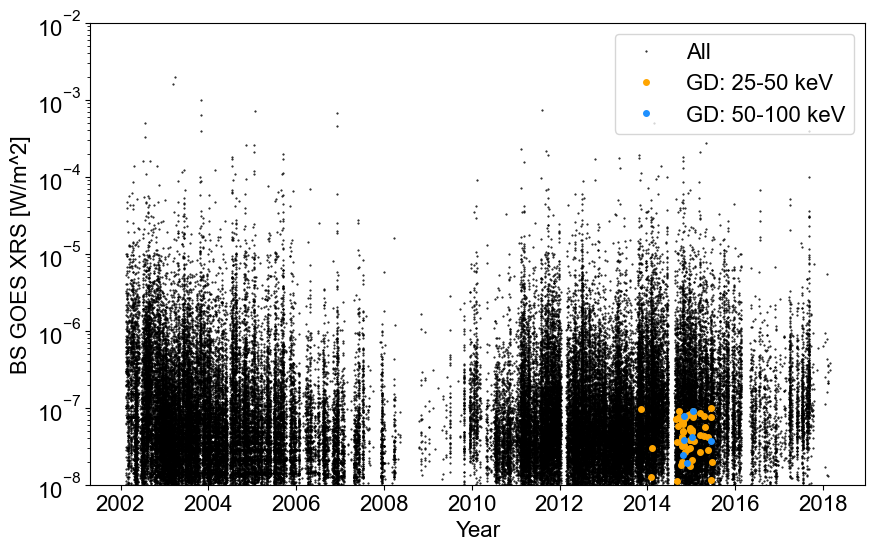

In [7]:
plt.rcParams.update({'font.size': 16,'font.family':"sans-serif",\
                     'font.sans-serif':"Arial",'mathtext.default':"regular"})

fig = plt.figure(figsize=(10, 6))
plt.plot(stimd,fl['bsges'],'.', markersize=1,label='All',color='black')
plt.plot(stimd[a0id25],fl['bsges'][a0id25],'.',label='GD: 25-50 keV', markersize=8,color='orange')
plt.plot(stimd[a0id50],fl['bsges'][a0id50],'.',label='GD: 50-100 keV', markersize=8,color='dodgerblue')
plt.yscale('log')
plt.legend(loc=1)
plt.xlabel('Year')
plt.ylim([1e-8,1e-2])
plt.ylabel('BS GOES XRS [W/m^2]')
plt.show()